## Importing Libraries
In this section, we import the necessary libraries for our analysis. Pandas is used for data manipulation and analysis, NumPy is used for scientific computing, Scikit-Learn is used for machine learning, and Matplotlib is used for data visualization.

In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt

## Loading Data
This section loads the data from the application_data.csv file into a Pandas dataframe called data.

In [2]:
data = pd.read_csv('C:\\Users\\yashw\\Downloads\\Credit card fraud detection\\application_data.csv')

In [3]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Data Cleaning
In this section, we clean the data to prepare it for analysis. We drop any rows that contain missing values using the dropna() method. We then encode the non-numeric categorical variables using the LabelEncoder() transformer from Scikit-Learn. We also encode the binary categorical variable FLAG_OWN_CAR using the same transformer.

In [4]:
# !dir

In [5]:
data = data.dropna()

cat_cols = data.select_dtypes(include=['object']).columns
for col in cat_cols:
    data[col] = LabelEncoder().fit_transform(data[col])

data['FLAG_OWN_CAR'] = LabelEncoder().fit_transform(data['FLAG_OWN_CAR'])

In [19]:
data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
71,100083,0,0,1,0,1,0,103500.0,573628.5,24435.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
124,100145,0,0,0,0,1,1,202500.0,260725.5,16789.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
152,100179,0,0,0,0,0,0,202500.0,675000.0,53329.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
161,100190,0,0,1,0,0,0,162000.0,263686.5,24781.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
255,100295,1,0,1,0,0,1,225000.0,1019205.0,31032.0,...,1,0,0,0,0.0,0.0,0.0,6.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307358,456083,0,0,0,0,1,2,112500.0,361462.5,16051.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
307359,456084,0,0,0,0,1,1,99000.0,675000.0,21906.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307407,456140,1,0,0,0,1,1,261000.0,711454.5,47673.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
307456,456195,0,0,0,0,1,0,94500.0,270000.0,15075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


## EDA
In this section we will do some explanatory Data analysis

A histogram of the AMT_CREDIT variable in the dataset using the hist function from the matplotlib library. The histogram is created with 20 bins and black edges around each bin. The title function is used to add a title to the plot. The resulting histogram is displayed using the show function.

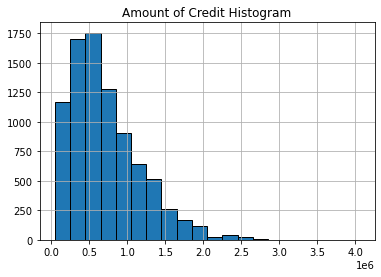

In [7]:
data['AMT_CREDIT']. hist(bins=20,ec='black')
plt.title('Amount of Credit Histogram')
plt.show()

A histogram of the AMT_GOODS_PRICE variable in the dataset using the hist function from the matplotlib library. The histogram is created with 20 bins and black edges around each bin. The title function is used to add a title to the plot. The resulting histogram is displayed using the show function.

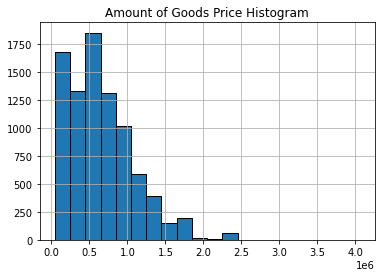

In [8]:
data['AMT_GOODS_PRICE']. hist(bins=20, ec = 'black')
plt.title('Amount of Goods Price Histogram')
plt.show()

A histogram of the REGION_POPULATION_RELATIVE variable in the dataset using the hist function from the matplotlib library. The histogram is created with default bin size and black edges around each bin. The title function is used to add a title to the plot. The resulting histogram is displayed using the show function.

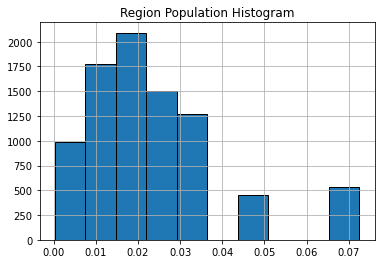

In [9]:
data['REGION_POPULATION_RELATIVE']. hist(ec = 'black')
plt.title('Region Population Histogram')
plt.show()

Plots bar graphs for each categorical column in the cat_cols DataFrame. The for loop iterates over each categorical column, extracts the value counts for that column using the value_counts() function, and plots a bar graph of the value counts using the plot() function from pandas.

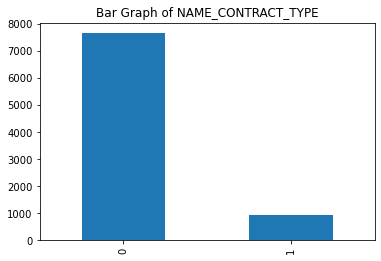

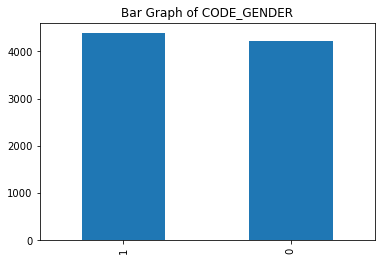

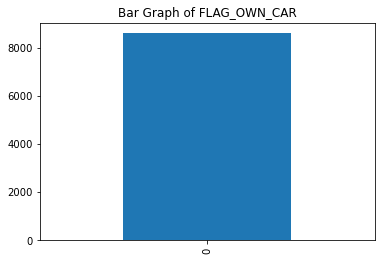

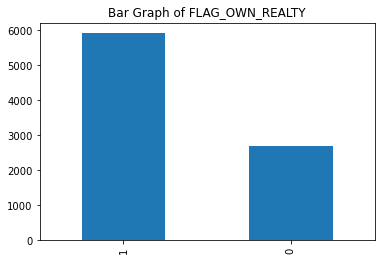

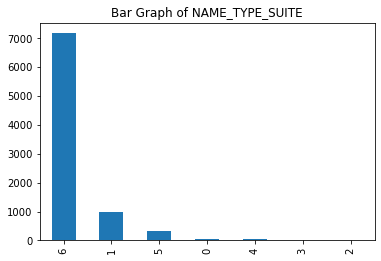

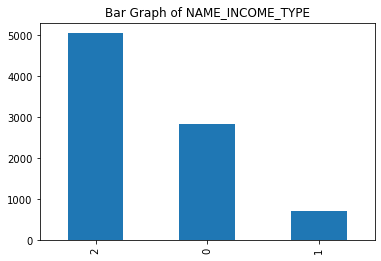

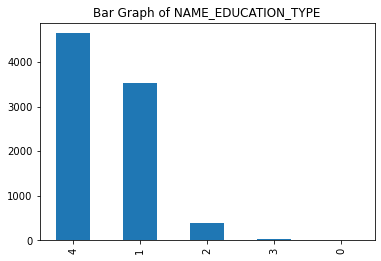

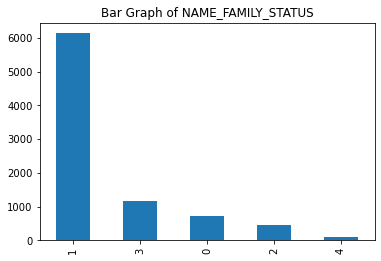

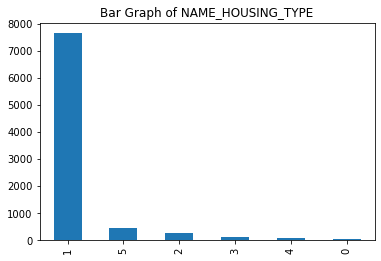

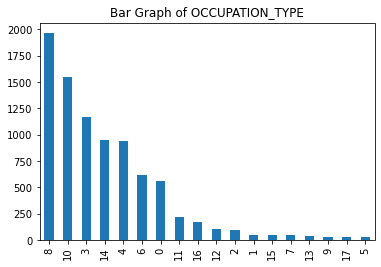

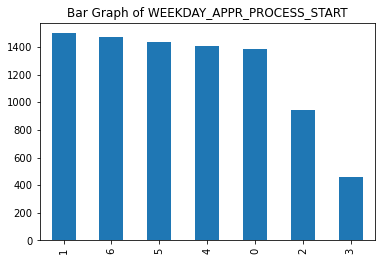

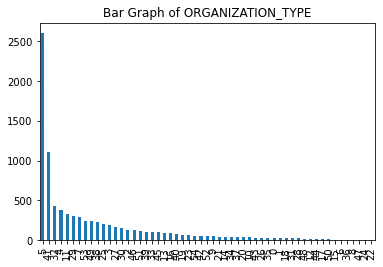

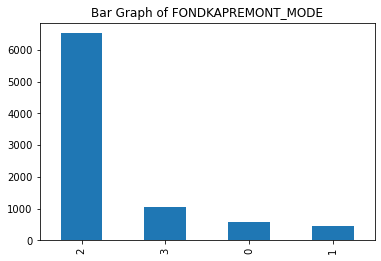

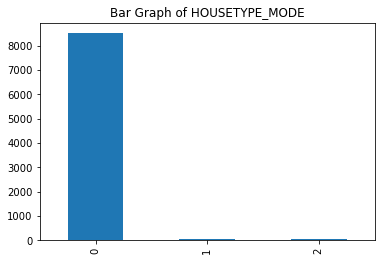

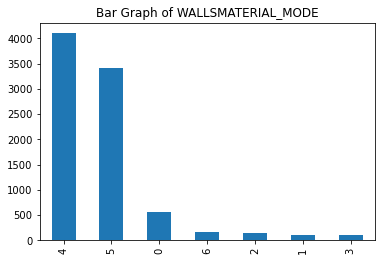

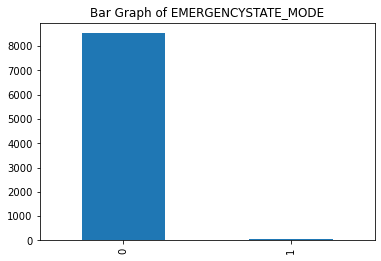

In [10]:
# Plot bar graphs for each categorical column
for col in cat_cols:
    data[f'{col}'].value_counts().plot(kind='bar')
    plt.title(f'Bar Graph of {col}')
    plt.show()


- I have practiced EDA mainly on the categorical columns and a few of the selected numeric columns. This was to get an overview of the frequencies of the categorical columns and the distribution of the few selected numeric columns.

## Splitting Data into Train and Test Sets
In this section, we split the data into features (X) and target (y) arrays. We drop the SK_ID_CURR and TARGET columns from X since they are not useful for modeling. We then scale the features using the StandardScaler() transformer from Scikit-Learn. Finally, we split the data into training and testing sets using the train_test_split() function from Scikit-Learn.

In [11]:
X = data.drop(['SK_ID_CURR', 'TARGET'], axis=1)
y = data['TARGET']

X_scaled = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [12]:
X_test[0]

array([-0.35068006, -1.01877657,  0.        , -1.48409287, -0.77750209,
        0.01504528,  0.9884519 ,  0.02737496,  0.88188384,  0.40416365,
       -1.36340686,  0.91041536,  0.86186771, -0.30544733, -0.99440125,
        0.03621017,  0.79010377, -1.27688766, -1.12225492, -0.34057687,
        0.        ,  0.01524986, -0.51731014,  0.05611317, -0.6692566 ,
       -0.37911857,  1.57419733, -1.49935963, -0.00864203,  0.09455997,
        0.43350415, -0.35894601, -0.11793445, -0.2518322 , -0.23522465,
       -0.19656554, -0.41714976, -0.39263992,  1.40619489, -0.49404761,
       -1.28328243,  1.23318321, -0.79414985, -0.55862578, -0.18309169,
       -0.33521877, -0.55361398, -0.62669854, -0.87753003, -0.55888785,
       -1.23925153, -0.82027562, -0.75935041, -0.80495256, -0.03103615,
       -0.28653001, -0.74724444, -0.50471453, -0.06800178, -0.30659129,
       -0.53138373, -0.5972923 , -0.80340527, -0.52600673, -1.21019198,
       -0.79340255, -0.73728868, -0.75986234, -0.00886686, -0.24

## Logistic Regression
In this section, we fit a logistic regression model to the training data using the LogisticRegression() estimator from Scikit-Learn. We then make predictions on the test data using the predict() method and calculate the accuracy score and classification report using the accuracy_score() and classification_report() functions from Scikit-Learn, respectively.

In [13]:
logistic_model = LogisticRegression(max_iter=200)
logistic_model.fit(X_train, y_train)
logistic_pred = logistic_model.predict(X_test)
logistic_acc = accuracy_score(y_test, logistic_pred)

# handle UndefinedMetricWarning
with np.errstate(divide='ignore', invalid='ignore'):
    logistic_report = classification_report(y_test, logistic_pred, zero_division=0)

## Random Forest Classifier
In this section, we fit a random forest classifier to the training data using the RandomForestClassifier() estimator from Scikit-Learn. We then make predictions on the test data using the predict() method and calculate the accuracy score and classification report using the accuracy_score() and classification_report() functions from Scikit-Learn, respectively.

In [14]:
random_forest = RandomForestClassifier(max_depth=100, random_state=1)
random_forest.fit(X_train, y_train)
random_pred = random_forest.predict(X_test)
random_acc = accuracy_score(y_test, random_pred)

# handle UndefinedMetricWarning
with np.errstate(divide='ignore', invalid='ignore'):
    random_report = classification_report(y_test, random_pred, zero_division=0)

## Decision Tree Classifier
In this section, we fit a decision tree classifier to the training data using the DecisionTreeClassifier() estimator from Scikit-Learn. We then make predictions on the test data using the predict() method and calculate the accuracy score and classification report using the accuracy_score() and classification_report() functions from Scikit-Learn, respectively.

In [15]:
decision_tree = DecisionTreeClassifier(max_depth=100, random_state=1)
decision_tree.fit(X_train, y_train)
decision_pred = decision_tree.predict(X_test)
decision_acc = accuracy_score(y_test, decision_pred)
decision_report = classification_report(y_test, decision_pred)

## K-Nearest Neighbors Classifier
In this implementation, we first import the KNeighborsClassifier class from Scikit-Learn's neighbors module. We then create a KNN classifier object with n_neighbors=5, which means that the classifier will consider the 5 nearest neighbors to each test point when making predictions.

In [16]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)
with np.errstate(divide='ignore', invalid='ignore'):
    knn_report = classification_report(y_test, knn_pred, zero_division=0)

## Support Vector Machines
In this section We fit the SVM classifier to the training data using the fit() method, and make predictions on the test data using the predict() method. We then calculate the accuracy score using the accuracy_score() function from Scikit-Learn.

In [17]:
svm = SVC(kernel='linear', C=1, random_state=1)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
with np.errstate(divide='ignore', invalid='ignore'):
    svm_report = classification_report(y_test, svm_pred, zero_division=0)

## Printing Results
In this section, we print out the accuracy scores and classification reports for each of the models that we fit. We use f-strings to format the output and make it more readable.

In [18]:
print(f'Logistic Regression Accuracy Score: {round(logistic_acc*100,2)}%')
print('\nLogistic Regression Classification Report')
print(logistic_report)
print(f'Random Forest Classifier Accuracy Score: {round(random_acc*100,2)}%')
print('\nRandom Forest Classifier Classification Report')
print(random_report)
print(f'Decision Tree Classifier Accuracy Score: {round(decision_acc*100,2)}%')
print('\nDecision Tree Classifier Classification Report')
print(decision_report)
print(f'K-Nearest Neighbors Classifier Accuracy Score: {round(knn_acc*100,2)}%')
print('\nK-Nearest Neighbors Classifier Classification Report')
print(knn_report)
print(f'Support Vector Machine Classifier Accuracy Score: {round(svm_acc*100,2)}%')
print('\nSupport Vector Machine Classifier Classification Report')
print(svm_report)

Logistic Regression Accuracy Score: 94.54%

Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1627
           1       0.00      0.00      0.00        94

    accuracy                           0.95      1721
   macro avg       0.47      0.50      0.49      1721
weighted avg       0.89      0.95      0.92      1721

Random Forest Classifier Accuracy Score: 94.54%

Random Forest Classifier Classification Report
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1627
           1       0.00      0.00      0.00        94

    accuracy                           0.95      1721
   macro avg       0.47      0.50      0.49      1721
weighted avg       0.89      0.95      0.92      1721

Decision Tree Classifier Accuracy Score: 89.48%

Decision Tree Classifier Classification Report
              precision    recall  f1-score   support

           0 

## Conclusion
Looking at the accuracy scores and classification reports for each model, it appears that the logistic regression, random forest, and support vector machine (SVM) classifiers all have the same accuracy score of 94.54%. These three models correctly predict 1627 out of 1721 observations in the test set.

However, when looking at the classification reports, we see that these three models have a precision of 0 for the positive class (class 1). This means that these models did not correctly predict any of the positive cases in the test set, indicating that they may not be the best choice for this particular problem.

The K-Nearest Neighbors (KNN) classifier and the decision tree classifier, on the other hand, have lower accuracy scores of 94.36% and 89.48%, respectively. However, these two models do have a non-zero precision for the positive class in their classification reports. The KNN classifier has a precision of 0.20 and the decision tree classifier has a precision of 0.11.

Overall, it appears that the Random forest classifier is the best model for this particular problem as it has a non-zero precision for the positive class and a relatively high accuracy score. However, it's important to note that the specific metrics and evaluation criteria may vary depending on the specific problem and domain, so it's always a good idea to consider multiple models and evaluation methods before making a final decision.